Data downloaded from: https://www.kaggle.com/datasets/ahsan81/used-handheld-device-data/download?datasetVersionNumber=2

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
path = 'drive/My Drive/Colab Notebooks/used_device_data.csv'
r_data= pd.read_csv(path)
r_data.head(10)

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


In [52]:
r_data.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [53]:
r_data.shape

(3454, 15)

In [54]:
r_data.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


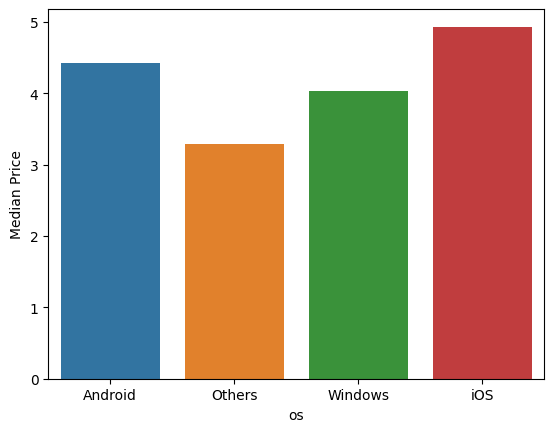

In [55]:
g_os=r_data.groupby("os")['normalized_used_price'].median()
ax = sns.barplot(x=g_os.index,y=g_os.values)
plt.ylabel('Median Price')
plt.xlabel('os')
plt.show()


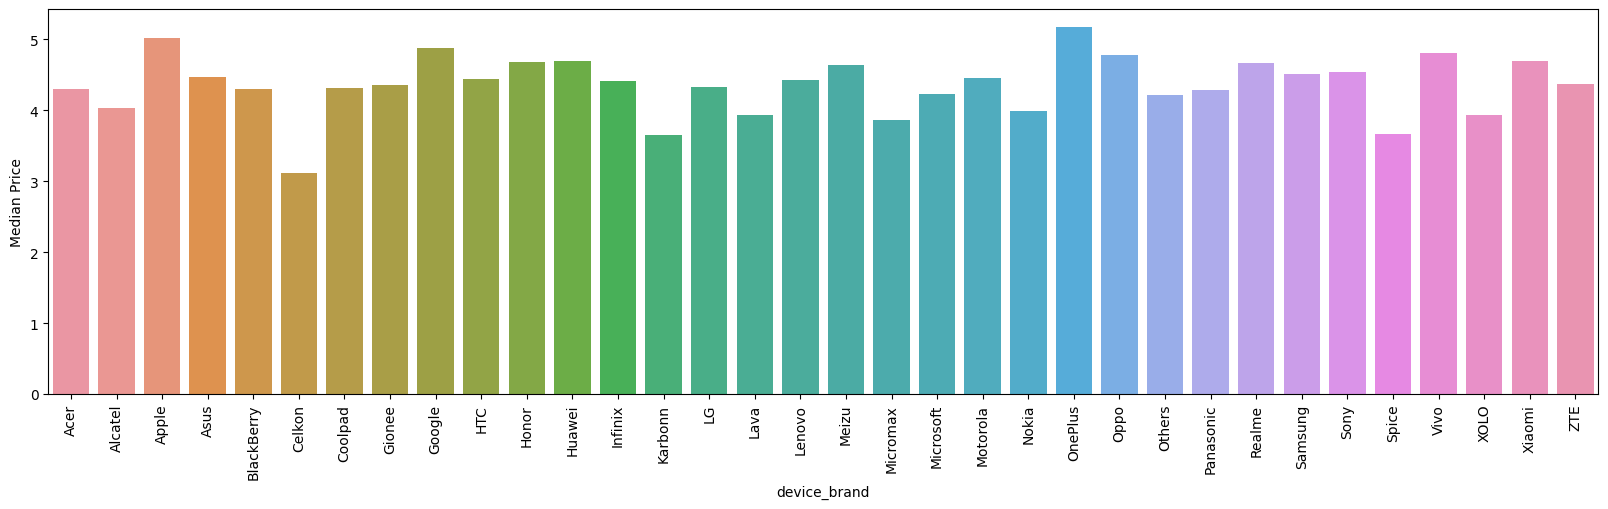

In [56]:
g_device_brand=r_data.groupby("device_brand")['normalized_used_price'].median()
plt.figure(figsize = (20, 5))
ax = sns.barplot(x=g_device_brand.index,y=g_device_brand.values)
plt.ylabel('Median Price')
plt.xlabel('device_brand')
plt.xticks(rotation = 90)
plt.show()

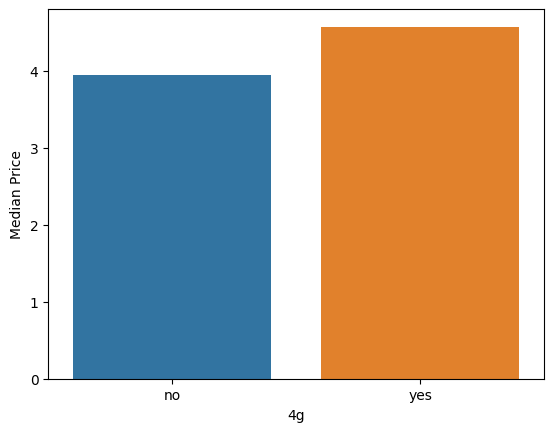

In [57]:
g_4g=r_data.groupby("4g")['normalized_used_price'].median()
ax = sns.barplot(x=g_4g.index,y=g_4g.values)
plt.ylabel('Median Price')
plt.xlabel('4g')
plt.show()

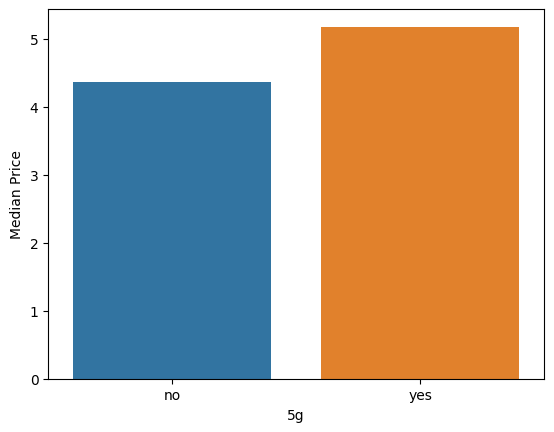

In [58]:
g_5g=r_data.groupby("5g")['normalized_used_price'].median()
ax = sns.barplot(x=g_5g.index,y=g_5g.values)
plt.ylabel('Median Price')
plt.xlabel('5g')
plt.show()

In [59]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [60]:
r_data['os']=r_data['os'].apply(pd.to_numeric, errors= 'coerce')
r_data['device_brand']=r_data['device_brand'].apply(pd.to_numeric, errors= 'coerce')
r_data['4g']=r_data['4g'].apply(pd.to_numeric, errors= 'coerce')
r_data['5g']=r_data['5g'].apply(pd.to_numeric, errors= 'coerce')
r_data=r_data.replace(np.nan, 0, regex= True)

In [61]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   float64
 1   os                     3454 non-null   float64
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   float64
 4   5g                     3454 non-null   float64
 5   rear_camera_mp         3454 non-null   float64
 6   front_camera_mp        3454 non-null   float64
 7   internal_memory        3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Setup the data**

In [62]:
x = r_data.drop('normalized_used_price',axis = 1)
y = r_data['normalized_used_price']

**Slip data into 70% training and 30% testing**

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=28)

In [64]:
x_train.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price
2,0.0,0.0,16.69,0.0,0.0,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631
3023,0.0,0.0,10.16,0.0,0.0,5.0,0.3,16.0,4.0,1400.0,120.0,2014,939,4.382901
2610,0.0,0.0,5.18,0.0,0.0,2.0,1.3,16.0,4.0,1200.0,99.5,2013,552,4.384399
3193,0.0,0.0,16.69,0.0,0.0,13.0,8.0,256.0,8.0,4000.0,190.0,2020,119,6.452191
2803,0.0,0.0,7.75,0.0,0.0,2.0,0.3,16.0,4.0,1200.0,105.0,2014,1088,4.112512


**Train the data using Linear Regression Model**

In [65]:
m_linear = LinearRegression()
m_linear.fit(x_train, y_train)

LinearRegression()

**Evaluate the Linear Regression Model**

In [66]:
m_linear.score(x_test, y_test)

0.8245234192452999

**Make predictions**

In [67]:
y_predict=m_linear.predict(x_test)

**Compare predicted values with actual values for evaluating the model**

In [68]:
print("mae：",mean_absolute_error(y_test,y_predict))
print('mse:',mean_squared_error(y_test,y_predict))
print("r2：",r2_score(y_test, y_predict))

mae： 0.18815146551176065
mse: 0.06103006034686832
r2： 0.8245234192452999


**Evaluate the Gradient Boosting Regression Model**

In [96]:
m_GBR= GradientBoostingRegressor()
m_GBR.fit(x_train, y_train)
m_GBR.score(x_test, y_test)
y_predict=m_GBR.predict(x_test)
print("mae：",mean_absolute_error(y_test,y_predict))
print('mse:',mean_squared_error(y_test,y_predict))
print("r2：",r2_score(y_test, y_predict))

mae： 0.17420734702581425
mse: 0.05208267139491295
r2： 0.8502493846310129


**Evaluate the Random Forest Regression Model**



In [95]:
m_RFR= RandomForestRegressor()
m_RFR.fit(x_train, y_train)
m_RFR.score(x_test, y_test)
y_predict=m_RFR.predict(x_test)
print("mae：",mean_absolute_error(y_test,y_predict))
print('mse:',mean_squared_error(y_test,y_predict))
print("r2：",r2_score(y_test, y_predict))

mae： 0.17789172375188034
mse: 0.055089682517556596
r2： 0.841603480840424
